In [6]:
import random
import pandas as pd

from exploratory_data_analysis import *

from model_fitting import *
from model_scaling import *

import logistic_regression as pyLR
import weight_of_evidence as pyWOE

from stability_evaluation import *
from ranking_evaluation import *
from ks_evaluation import *

In [2]:
import xgboost as xgb

# 示例数据：泰坦尼克数据集

In [7]:
df = pd.read_csv('test_data.csv')
df['rand_num'] = [random.random() for x in range(df.shape[0])]
df['group'] = df['rand_num'].apply(lambda x: 'INS' if x < 0.6 else 'OOS')
df = df.drop(['rand_num'], axis=1)
print(df.shape)
df.head()

(891, 13)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,INS
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,INS
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,OOS
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,OOS
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,INS


In [28]:
target = 'Survived'
o_col  = ['PassengerId', 'Name', 'group']
c_cols = ['Age', 'SibSp', 'Fare', 'Parch']
d_cols = ['Pclass', 'Sex', 'Embarked']

# 探索性数据分析(EDA)

## 目标变量分布(Target Rate)

In [22]:
target_rate_stat_df = target_rate_stat(input_df=df, target_var_list=[target], group_var='group')
target_rate_stat_df

100%|██████████| 1/1 [00:00<00:00, 29.48it/s]


,group,total,effs,effs_rate,inters,goods,bads,odds,bad_rate,bad_def
0,INS,536,536,1.0,0,340,196,0.576471,0.365672,Survived
1,OOS,355,355,1.0,0,209,146,0.698565,0.411268,Survived


## 缺失率统计(Missing Rate)

In [19]:
missing_rate_stat_df = missing_rate_stat(input_df=df, group_var='group')
missing_rate_stat_df

100%|██████████| 2/2 [00:00<00:00, 16.20it/s]


,INS,OOS,mean,std,cv
Embarked,0.000000,0.005634,0.002817,0.003984,1.043700
Age,0.205224,0.188732,0.196978,0.011661,0.058902
Cabin,0.770522,0.771831,0.771177,0.000925,0.001198
group,0.000000,0.000000,0.000000,0.000000,0.000000
Fare,0.000000,0.000000,0.000000,0.000000,0.000000
Ticket,0.000000,0.000000,0.000000,0.000000,0.000000
Parch,0.000000,0.000000,0.000000,0.000000,0.000000
SibSp,0.000000,0.000000,0.000000,0.000000,0.000000
Sex,0.000000,0.000000,0.000000,0.000000,0.000000
Name,0.000000,0.000000,0.000000,0.000000,0.000000


## 探索数据分布(EDD)

### 连续变量

#### 数据分布

In [17]:
# edd_for_continue_var?

In [9]:
edd_table_4c = edd_for_continue_var(input_df=df, group_var='group')
edd_table_4c

100%|██████████| 2/2 [00:00<00:00, 27.93it/s]


,group,total,cover_cnt,cover_rate,mean,std,min,25%,50%,75%,max
Age,INS,536,426,0.794776,29.660822,14.221400,0.42,21.0000,28.00000,37.7500,80.0000
Age,OOS,355,288,0.811268,29.755764,14.991240,0.83,20.0000,29.00000,40.0000,74.0000
Fare,INS,536,536,1.000000,30.133644,44.237679,0.00,7.8958,14.25415,30.0000,512.3292
Fare,OOS,355,355,1.000000,35.330468,56.873611,0.00,7.9250,15.05000,31.3875,512.3292
Parch,INS,536,536,1.000000,0.352612,0.764097,0.00,0.0000,0.00000,0.0000,5.0000
Parch,OOS,355,355,1.000000,0.425352,0.864837,0.00,0.0000,0.00000,1.0000,6.0000
PassengerId,INS,536,536,1.000000,449.149254,252.848645,1.00,230.7500,445.00000,667.2500,891.0000
PassengerId,OOS,355,355,1.000000,441.245070,264.299488,3.00,205.0000,447.00000,672.5000,890.0000
Pclass,INS,536,536,1.000000,2.317164,0.838425,1.00,2.0000,3.00000,3.0000,3.0000
Pclass,OOS,355,355,1.000000,2.295775,0.833520,1.00,2.0000,3.00000,3.0000,3.0000


In [10]:
set(edd_table_4c.index)

{'Age', 'Fare', 'Parch', 'PassengerId', 'Pclass', 'SibSp', 'Survived'}

#### 变异系数

In [11]:
cv_table_4c = cv_grouply_table(edd_table=edd_table_4c)
cv_table_4c

,INS,OOS,mean,std,cv,eval_index
Age,29.660822,29.755764,29.708293,0.067134,0.002260,mean
Pclass,2.317164,2.295775,2.306469,0.015125,0.006555,mean
SibSp,0.520522,0.526761,0.523641,0.004411,0.008408,mean
PassengerId,449.149254,441.245070,445.197162,5.589102,0.012554,mean
Survived,0.365672,0.411268,0.388470,0.032241,0.082782,mean
Fare,30.133644,35.330468,32.732056,3.674709,0.112263,mean
Parch,0.352612,0.425352,0.388982,0.051435,0.131891,mean


### 离散变量

In [16]:
# edd_for_discrete_var?

In [13]:
edd_table_4d = edd_for_discrete_var(input_df=df, group_var='group')
edd_table_4d

100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


,variable,value,total,cover_cnt,cover_rate,group
0,Name,"Abbing, Mr. Anthony",891,1,0.001122,INS
1,Name,"Abbott, Mr. Rossmore Edward",891,1,0.001122,INS
2,Name,"Abbott, Mrs. Stanton (Rosa Hunt)",891,1,0.001122,INS
3,Name,"Abelson, Mr. Samuel",891,1,0.001122,INS
4,Name,"Abelson, Mrs. Samuel (Hannah Wizosky)",891,1,0.001122,INS
5,Name,"Adahl, Mr. Mauritz Nils Martin",891,1,0.001122,INS
6,Name,"Adams, Mr. John",891,1,0.001122,INS
7,Name,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",891,1,0.001122,INS
8,Name,"Aks, Mrs. Sam (Leah Rosen)",891,1,0.001122,INS
9,Name,"Albimona, Mr. Nassef Cassem",891,1,0.001122,INS


In [15]:
set(edd_table_4d.variable)

{'Cabin', 'Embarked', 'Name', 'Sex', 'Ticket', 'group'}

## 变量稳定性(PSI)

### 连续变量

In [30]:
# psi_for_continue_var?

In [31]:
c_var_psi_value = psi_for_continue_var(expected_array=df[df['group'] == 'INS']['Fare'], 
                                       actual_array=df[df['group'] == 'OOS']['Fare'], 
                                       bins=10, 
                                       buckettype='bins', detail=False, save_file_path=None)
c_var_psi_value

0.02408031924809135

In [32]:
c_var_psi_value = psi_for_continue_var(expected_array=df[df['group'] == 'INS']['Fare'], 
                                       actual_array=df[df['group'] == 'OOS']['Fare'], 
                                       bins=10, 
                                       buckettype='bins', detail=1, save_file_path=None)
c_var_psi_value

,score_range,expected(%),actucal(%),ac - ex(%),ln(ac/ex),psi,max
0,"[0.0,51.2329]",82.835821,81.13,-1.71,-0.020808,0.000356,
1,"(51.2329,102.4658]",12.313433,11.27,-1.05,-0.088539,0.000928,
2,"(102.4658,153.6988]",2.611940,4.79,2.18,0.606263,0.013195,<<<<<<<
3,"(153.6988,204.9317]",0.373134,0.00,-0.37,-5.924615,0.003597,
4,"(204.9317,256.1646]",1.119403,1.41,0.29,0.230610,0.000664,
5,"(256.1646,307.3975]",0.559701,0.85,0.29,0.417223,0.001176,
6,"(307.3975,358.6304]",0.000000,0.00,0.00,0.000000,0.000000,
7,"(358.6304,409.8634]",0.000000,0.00,0.00,0.000000,0.000000,
8,"(409.8634,461.0963]",0.000000,0.00,0.00,0.000000,0.000000,
9,"(461.0963,512.3292]",0.186567,0.56,0.38,1.095584,0.004164,


### 离散变量

In [33]:
# psi_for_discrete_var?

In [39]:
# 不显示计算明细
d_var_psi_value = psi_for_discrete_var(expected_array=df[df['group'] == 'INS']['Cabin'], 
                                       actual_array=df[df['group'] == 'OOS']['Cabin'], 
                                       max_bins=104, 
                                       detail=False, save_file_path=None)
d_var_psi_value

9.57040849298616

In [42]:
#  显示计算明细
d_var_psi_value = psi_for_discrete_var(expected_array=df[df['group'] == 'INS']['Cabin'], 
                                       actual_array=df[df['group'] == 'OOS']['Cabin'], 
                                       max_bins=104, 
                                       detail=1, save_file_path=None)
d_var_psi_value

,score_range,expected(%),actucal(%),ac - ex(%),ln(ac/ex),psi,max
0,A10,0.81,0.00,-0.81,-6.698268,0.052684,
1,A14,0.81,0.00,-0.81,-6.698268,0.052684,
2,A16,0.81,0.00,-0.81,-6.698268,0.052684,
3,A19,0.00,1.23,1.23,7.115582,0.090379,
4,A20,0.81,0.00,-0.81,-6.698268,0.052684,
5,A23,0.81,0.00,-0.81,-6.698268,0.052684,
6,A24,0.81,0.00,-0.81,-6.698268,0.052684,
7,A26,0.00,1.23,1.23,7.115582,0.090379,
8,A31,0.00,1.23,1.23,7.115582,0.090379,
9,A32,0.81,0.00,-0.81,-6.698268,0.052684,


### 批量统计

In [23]:
# psi_grouply_table?

In [29]:
var_psi_table = psi_grouply_table(input_df=df, 
                              group_var='group', 
                              benchmark_list=['INS'],
                              compare_list=['OOS'],
                              c_var_list=c_cols,
                              d_var_list=d_cols, 
                              save_file_path=None, progress=1)
var_psi_table

> Fare
> SibSp
> Age
> Parch
> Pclass
> Sex
> Embarked


,OOS,mean,benchmark
Sex,0.0008,0.0008,INS
Pclass,0.0032,0.0032,INS
SibSp,0.0083,0.0083,INS
Embarked,0.0141,0.0141,INS
Fare,0.0241,0.0241,INS
Age,0.0248,0.0248,INS
Parch,0.0276,0.0276,INS


# 特征处理(Feature Process)

## WOE分箱

# 特征筛选(Feature Select)

In [4]:
model = xgb.XGBClassifier()
fitted_model = model.fit(df[c_cols], df[target])
df['score'] = list(fitted_model.predict_proba(df[c_cols])[:,1])

In [3]:
train_model?

In [5]:
trained_model = train_model(model=model, 
                     X_train=df[c_cols].fillna(999999), 
                     y_train=df[target])

模型开始训练中...
Running time: 0.0006371 Minutes
输出模型训练结果...
KS Value  (INS): 0.5412
Accuracy  (INS): 0.7722
AUC Score (INS): 0.854296
--------------------


In [6]:
x1, x2 = test_model(trained_model, df[c_cols].fillna(999999), df[target])

开始模型预测...
KS Value  (OOT): 0.5412
Accuracy  (OOT): 0.7722
AUC Score (OOT): 0.854296
--------------------


In [7]:
output_df = feat_importance(model=trained_model, feat_list=c_cols, accumulate_score=0.95)
output_df

[0.4267857, 0.35892856, 0.09821428, 0.060714286, 0.055357143]
累积score达到0.95时的特征序号为4


,var,score,top
0,Fare,0.426786,
1,Age,0.358929,
2,SibSp,0.098214,
3,Pclass,0.060714,
4,Parch,0.055357,<<<


In [45]:
# stat_df, np_df, regroup, bins = ChiMerge(df, 'Fare', target, confidence_value=3.841, bin=5, sample_ratio=None)
# bins

In [18]:
def compute_WOE_IV(df,col,target):
    """
    param df:DataFrame|包含feature和label
    param col:str|feature名称，col这列已经经过分箱
    param taget:str|label名称,0,1
    return 每箱的WOE(字典类型）和总的IV之和,注意考虑计算时候分子分母为零的溢出情况
    """
    import numpy as np
    
    total = df.groupby([col])[target].count() #计算col每个分组中的样本总数
    total = pd.DataFrame({'total': total})
    
    bad   = df.groupby([col])[target].sum()   #计算col每个分组中的目标取值为1的总数，关注的正样本
    bad   = pd.DataFrame({'bad': bad})
    
    regroup = total.merge(bad,left_index=True,right_index=True,how='left')
    regroup.reset_index(level=0,inplace=True)
    
    N = sum(regroup['total'])  #样本总数
    B = sum(regroup['bad'])    #正样本总数
    
    regroup['good'] = regroup['total'] - regroup['bad'] #计算col每个分组中的目标取值为0的总数，关注的负样本
    G = N - B #负样本总数
    
    regroup['bad_pcnt'] = regroup['bad'].map(lambda x: x*1.0/B)
    regroup['good_pcnt'] = regroup['good'].map(lambda x: x * 1.0 / G)
    
    regroup["WOE"] = regroup.apply(lambda x:np.log(x.good_pcnt*1.0/x.bad_pcnt),axis=1)
    
    WOE_dict = regroup[[col,"WOE"]].set_index(col).to_dict(orient="index")
    IV = regroup.apply(lambda x:(x.good_pcnt-x.bad_pcnt)*np.log(x.good_pcnt*1.0/x.bad_pcnt),axis = 1)
    
    IV = sum(IV)
    
    return {"WOE":WOE_dict,"IV":IV}

In [22]:
compute_WOE_IV(df=df,col='Sex',target=target)

{'WOE': {'female': {'WOE': -1.5298770033401874},
  'male': {'WOE': 0.9838327092415774}},
 'IV': 1.3416814135556492}

In [46]:
psi_for_continue_var(expected_array=df['score'][:400],
                     actual_array=df['score'][401:], 
                     bins=5, buckettype='bins', detail=0)


0.0059132756739701245

In [47]:
psi_for_continue_var(expected_array=df['score'][:400],
                     actual_array=df['score'][401:], 
                     bins=5, buckettype='quantiles', detail=0)

0.011011490531076251

In [48]:
psi_for_continue_var(expected_array=df['score'][:400],
                           actual_array=df['score'][401:], 
                           bins=5, buckettype='bins', detail=1)

,score_range,expected(%),actucal(%),ac - ex(%),ln(ac/ex),psi,max
0,"[0.0247,0.2135]",29.00,30.82,1.82,0.060866,0.001103,
1,"(0.2135,0.4022]",31.75,29.39,-2.36,-0.077236,0.001826,
2,"(0.4022,0.591]",18.75,18.16,-0.59,-0.031971,0.000187,
3,"(0.591,0.7797]",12.25,11.84,-0.41,-0.034039,0.000142,
4,"(0.7797,0.9684]",8.25,9.80,1.55,0.172150,0.002655,<<<<<<<
5,>>> summary,100.00,100.00,NaN,NaN,0.005913,<<< result


,seg2,mean,benchmark
Fare,0.0349,0.0349,seg1
score,0.6396,0.6396,seg1
Age,4.7407,4.7407,seg1


In [50]:
psi_grouply_table?

In [51]:
psi_grouply_table(input_df=df, group_var='group', benchmark_list=['seg1'], 
                  compare_list=None, c_var_list=['Age', 'Fare', 'score'], d_var_list=['Cabin'])

,seg2,mean,benchmark
Fare,0.0349,0.0349,seg1
score,0.6396,0.6396,seg1
Age,4.7407,4.7407,seg1
Cabin,11.9688,11.9688,seg1


In [52]:
psi_grouply_table(input_df=df, 
                  group_var='group',
                  benchmark_list=['seg1'], 
                  compare_list=None, 
                  c_var_list=['Age','Fare', 'score'],
                  d_var_list=['Age', 'Cabin'])

,seg2,mean,benchmark
Fare,0.0349,0.0349,seg1
score,0.6396,0.6396,seg1
Cabin,11.9688,11.9688,seg1
Age,18.3655,18.3655,seg1


In [53]:
psi_for_discrete_var(expected_array=df[df['group'] == 'seg1']['Age'], 
                     actual_array=df[df['group'] == 'seg2']['Age'], 
                     detail=0)

18.36553668288402

In [54]:
psi_for_discrete_var(expected_array=df[df['group'] == 'seg1']['Cabin'], 
                     actual_array=df[df['group'] == 'seg2']['Cabin'], detail=1).head()

,score_range,expected(%),actucal(%),ac - ex(%),ln(ac/ex),psi,max
0,A10,0.87,0.00,-0.87,-6.769642,0.057764,
1,A14,0.00,1.12,1.12,7.021976,0.080433,
2,A16,0.00,1.12,1.12,7.021976,0.080433,
3,A19,0.00,1.12,1.12,7.021976,0.080433,
4,A20,0.00,1.12,1.12,7.021976,0.080433,


In [55]:
psi_for_continue_var(expected_array=df[df['group'] == 'seg1']['Fare'], 
                     actual_array=df[df['group'] == 'seg2']['Fare'], bins=5, detail=0)

0.007954596549151581

In [56]:
psi_grouply_table(input_df=df, group_var='group',
                  benchmark_list=['seg1'], compare_list=None, c_var_list=['Age'], d_var_list=[], progress=1)

> Age


,seg2,mean,benchmark
Age,4.7407,4.7407,seg1


In [57]:
ks_grouply_calculate?

In [ ]:
def IV_Calculate_(InputDf, Cols, TargetVar, group_list=None):
    '''
    功能：统计变量的IV值，并降序排列
    Args:      
       InputDf: 输入的dataframe
       Cols: list, 特征列表。示例: ['x1', 'x2']
       TargetVar: string, 目标变量。示例: 's1d30'
    Returns:      
       Output: 统计变量的IV值
    '''
    InputDf = InputDf.loc[(InputDf[TargetVar].isin([0,1])), :]
    col_dtype = dict(InputDf.dtypes)
    
    def iv_apply(x, y, col_dtype):
        col = x.name
        if col_dtype[col] == object:
            v_type = 'd'
        else:
            v_type = 'c'
        woe = WoE(qnt_num=10, min_block_size=10, v_type=v_type, t_type='b') 
        woe.fit(x, y)
        return woe.iv
    
    def group_apply(df_):
        iv_ = df_[Cols].apply(iv_apply, axis=0, args=(df_[TargetVar], col_dtype)).reset_index()
        iv_.columns = ['variable','iv']
        return iv_ 

In [74]:
ks_table?

In [11]:
ks_t1 = ks_table(input_df=df, score_var='score', target_var='Survived', 
             loan_var=None, eff_var=None, 
             bins=10, bin_mode=1,
             score_bmk_list=None, bin_break_list=None, ascending=1)
ks_t1

,bucket,min_score,max_score,delta_score,total,total_rate,rejects,reject_rate,loans,loan_rate,...,bads,bad_rate,cum_bad_rate,cum_good_rate,odds,lift,cum_lift,ks_sign,ks,max_ks
0,1,0.024742,0.099007,0.074265,107,12.01%,0,0.00%,107,100.00%,...,1,0.93%,0.29%,19.31%,0.0094,0.0243,0.0243,-,19.02,
1,2,0.099358,0.147083,0.047725,72,8.08%,0,0.00%,72,100.00%,...,2,2.78%,0.88%,32.06%,0.0286,0.0724,0.0437,-,31.18,
2,3,0.149131,0.213832,0.064701,89,9.99%,0,0.00%,89,100.00%,...,14,15.73%,4.97%,45.72%,0.1867,0.4098,0.1653,-,40.75,
3,4,0.218895,0.295644,0.076749,90,10.10%,0,0.00%,90,100.00%,...,17,18.89%,9.94%,59.02%,0.2329,0.4921,0.2474,-,49.07,
4,5,0.296672,0.353568,0.056896,88,9.88%,0,0.00%,88,100.00%,...,31,35.23%,19.01%,69.40%,0.5439,0.9178,0.3797,-,50.39,
5,6,0.353585,0.390298,0.036713,89,9.99%,0,0.00%,89,100.00%,...,31,34.83%,28.07%,79.96%,0.5345,0.9075,0.4675,-,51.89,<<<<<<
6,7,0.397621,0.485954,0.088334,89,9.99%,0,0.00%,89,100.00%,...,44,49.44%,40.94%,88.16%,0.9778,1.2880,0.5845,-,47.22,
7,8,0.488339,0.608566,0.120226,89,9.99%,0,0.00%,89,100.00%,...,50,56.18%,55.56%,95.26%,1.2821,1.4636,0.6942,-,39.71,
8,9,0.612747,0.757217,0.144470,91,10.21%,0,0.00%,91,100.00%,...,67,73.63%,75.15%,99.64%,2.7917,1.9182,0.8328,-,24.49,
9,10,0.757747,0.968446,0.210699,87,9.76%,0,0.00%,87,100.00%,...,85,97.70%,100.00%,100.00%,42.5000,2.5454,1.0000,-,0.00,


> score类似<欺诈分>, 取值越大，P(bad)越大.


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

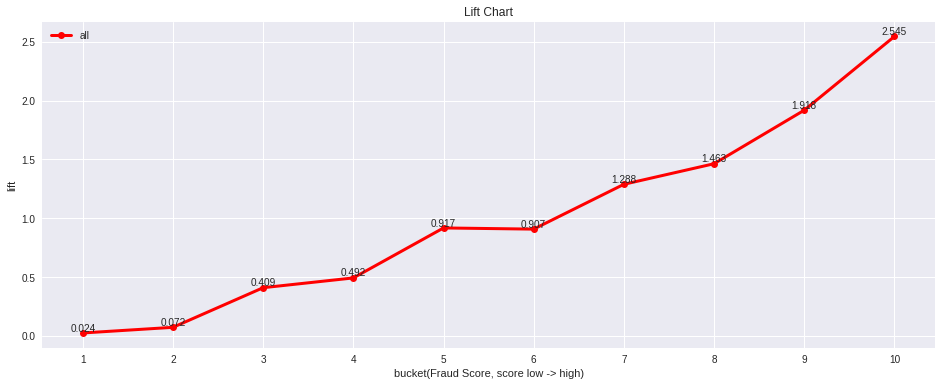

In [12]:
model_ranking_eval(ks_t1, ranking_index='lift', show_data=1)

In [80]:
model_ranking_eval?

In [13]:
ks_table(input_df=df[df['group'] == 'seg1'], score_var='score', target_var='Survived', 
         loan_var=None, eff_var=None, 
         bins=10, bin_mode=3,
         score_bmk_list=df[df['group'] == 'seg1']['score'], bin_break_list=None, ascending=0)

,bucket,min_score,max_score,delta_score,total,total_rate,rejects,reject_rate,loans,loan_rate,...,bads,bad_rate,cum_bad_rate,cum_good_rate,odds,lift,cum_lift,ks_sign,ks,max_ks
0,1,0.835127,0.968446,0.133319,55,10.00%,0,0.00%,55,100.00%,...,53,96.36%,23.14%,0.62%,26.5000,2.3144,2.3144,+,22.52,
1,2,0.685439,0.833946,0.148506,55,10.00%,0,0.00%,55,100.00%,...,46,83.64%,43.23%,3.42%,5.1111,2.0087,2.1616,+,39.82,
2,3,0.553896,0.678866,0.124969,55,10.00%,0,0.00%,55,100.00%,...,37,67.27%,59.39%,9.01%,2.0556,1.6157,1.9796,+,50.38,
3,4,0.451904,0.552215,0.100311,55,10.00%,0,0.00%,55,100.00%,...,29,52.73%,72.05%,17.08%,1.1154,1.2664,1.8013,+,54.97,<<<<<<
4,5,0.353568,0.449175,0.095607,55,10.00%,0,0.00%,55,100.00%,...,17,30.91%,79.48%,28.88%,0.4474,0.7424,1.5895,+,50.59,
5,6,0.300845,0.352368,0.051524,55,10.00%,0,0.00%,55,100.00%,...,19,34.55%,87.77%,40.06%,0.5278,0.8297,1.4629,+,47.71,
6,7,0.258494,0.299822,0.041328,54,9.82%,0,0.00%,54,100.00%,...,12,22.22%,93.01%,53.11%,0.2857,0.5337,1.3322,+,39.91,
7,8,0.163905,0.257758,0.093853,55,10.00%,0,0.00%,55,100.00%,...,12,21.82%,98.25%,66.46%,0.2791,0.5240,1.2310,+,31.79,
8,9,0.103033,0.160611,0.057578,56,10.18%,0,0.00%,56,100.00%,...,3,5.36%,99.56%,82.92%,0.0566,0.1287,1.1063,+,16.64,
9,10,0.034719,0.099007,0.064288,55,10.00%,0,0.00%,55,100.00%,...,1,1.82%,100.00%,99.69%,0.0185,0.0437,1.0000,+,0.31,


In [85]:
ks_table(input_df=df, score_var='score', target_var='Survived', 
         loan_var=None, eff_var=None, 
         bins=10, bin_mode=3,
         score_bmk_list=df[df['group'] == 'seg1']['score'], bin_break_list=None, ascending=0)

,bucket,min_score,max_score,delta_score,total,total_rate,rejects,reject_rate,loans,loan_rate,...,bads,bad_rate,cum_bad_rate,cum_good_rate,odds,lift,cum_lift,ks_sign,ks,max_ks
0,1,0.835127,0.968446,0.133319,59,6.64%,0,0.00%,59,100.00%,...,57,96.61%,16.67%,0.36%,28.5000,2.5113,2.5113,+,16.30,
1,2,0.679732,0.833946,0.154214,77,8.66%,0,0.00%,77,100.00%,...,68,88.31%,36.55%,2.00%,7.5556,2.2956,2.3892,+,34.55,
2,3,0.553896,0.678866,0.124969,75,8.44%,0,0.00%,75,100.00%,...,45,60.00%,49.71%,7.47%,1.5000,1.5596,2.0943,+,42.24,
3,4,0.451904,0.552215,0.100311,96,10.80%,0,0.00%,96,100.00%,...,54,56.25%,65.50%,15.12%,1.2857,1.4622,1.8966,+,50.38,
4,5,0.353568,0.449175,0.095607,139,15.64%,0,0.00%,139,100.00%,...,54,38.85%,81.29%,30.60%,0.6353,1.0098,1.6203,+,50.69,<<<<<<
5,6,0.300845,0.352368,0.051524,78,8.77%,0,0.00%,78,100.00%,...,28,35.90%,89.47%,39.71%,0.5600,0.9331,1.5180,+,49.77,
6,7,0.258494,0.299822,0.041328,63,7.09%,0,0.00%,63,100.00%,...,13,20.63%,93.27%,48.82%,0.2600,0.5364,1.4126,+,44.46,
7,8,0.163905,0.257758,0.093853,88,9.90%,0,0.00%,88,100.00%,...,16,18.18%,97.95%,61.93%,0.2222,0.4726,1.2901,+,36.02,
8,9,0.099358,0.160611,0.061253,109,12.26%,0,0.00%,109,100.00%,...,6,5.50%,99.71%,80.69%,0.0583,0.1431,1.1306,+,19.02,
9,10,0.028756,0.099007,0.070251,105,11.81%,0,0.00%,105,100.00%,...,1,0.95%,100.00%,99.64%,0.0096,0.0248,1.0000,+,0.36,


In [86]:
ks_table(input_df=df, score_var='score', target_var='Survived', 
         loan_var=None, eff_var=None, 
         bins=10, bin_mode=4,
         score_bmk_list=None, bin_break_list=[0, 0.2, 0.6, 0.7, 0.8, 1], ascending=0)

,bucket,min_score,max_score,delta_score,total,total_rate,rejects,reject_rate,loans,loan_rate,...,bads,bad_rate,cum_bad_rate,cum_good_rate,odds,lift,cum_lift,ks_sign,ks,max_ks
0,1,0.800035,0.968446,0.168410,77,8.64%,0,0.00%,77,100.00%,...,75,97.40%,21.93%,0.36%,37.5000,2.5376,2.5376,+,21.57,
1,2,0.710238,0.794839,0.084601,46,5.16%,0,0.00%,46,100.00%,...,39,84.78%,33.33%,1.64%,5.5714,2.2088,2.4146,+,31.69,
2,3,0.601145,0.699099,0.097954,60,6.73%,0,0.00%,60,100.00%,...,40,66.67%,45.03%,5.28%,2.0000,1.7368,2.1924,+,39.75,
3,4,0.201230,0.598180,0.396950,452,50.73%,0,0.00%,452,100.00%,...,175,38.72%,96.20%,55.74%,0.6318,1.0087,1.3498,+,40.46,<<<<<<
4,5,0.024742,0.198938,0.174196,256,28.73%,0,0.00%,256,100.00%,...,13,5.08%,100.00%,100.00%,0.0535,0.1323,1.0000,+,0.00,


In [14]:
ks_g = ks_grouply_table(input_df=df, score_var='score', target_var='Survived', 
                 loan_var=None, eff_var=None, 
                 bins=10, bin_mode=2, group_var='group', group_list=None,
                 score_bmk_list=df[df['group'] == 'seg1']['score'], bin_break_list=None, ascending=False,
                 save_file_path=None)
ks_g

,bucket,min_score,max_score,delta_score,total,total_rate,rejects,reject_rate,loans,loan_rate,...,cum_bad_rate,cum_good_rate,odds,lift,cum_lift,ks_sign,ks,max_ks,group,bin_mode
0,1,0.875561,0.968446,0.092885,37,6.72%,0,0.00%,37,100.00%,...,16.16%,0.00%,inf,2.4061,2.4061,+,16.16,,seg1,equal_dist
1,2,0.787754,0.872664,0.084910,38,6.90%,0,0.00%,38,100.00%,...,31.88%,0.62%,18.0000,2.2795,2.3420,+,31.26,,seg1,equal_dist
2,3,0.689732,0.775447,0.085715,34,6.17%,0,0.00%,34,100.00%,...,43.23%,3.11%,3.2500,1.8400,2.1854,+,40.13,,seg1,equal_dist
3,4,0.592779,0.685439,0.092661,32,5.81%,0,0.00%,32,100.00%,...,52.84%,6.21%,2.2000,1.6542,2.0648,+,46.63,,seg1,equal_dist
4,5,0.498497,0.591121,0.092624,53,9.62%,0,0.00%,53,100.00%,...,65.50%,13.66%,1.2083,1.3166,1.8604,+,51.84,,seg1,equal_dist
5,6,0.406508,0.496916,0.090408,38,6.90%,0,0.00%,38,100.00%,...,74.24%,19.25%,1.1111,1.2664,1.7631,+,54.98,<<<<<<,seg1,equal_dist
6,7,0.311013,0.403556,0.092543,80,14.52%,0,0.00%,80,100.00%,...,84.72%,36.65%,0.4286,0.7218,1.4961,+,48.07,,seg1,equal_dist
7,8,0.222575,0.306412,0.083837,97,17.60%,0,0.00%,97,100.00%,...,95.20%,59.32%,0.3288,0.5953,1.2825,+,35.88,,seg1,equal_dist
8,9,0.122524,0.213832,0.091308,69,12.52%,0,0.00%,69,100.00%,...,99.56%,77.64%,0.1695,0.3487,1.1477,+,21.92,,seg1,equal_dist
9,10,0.027673,0.121406,0.093733,73,13.25%,0,0.00%,73,100.00%,...,100.00%,100.00%,0.0139,0.0330,1.0000,+,0.00,,seg1,equal_dist


> score类似<欺诈分>, 取值越大，P(bad)越大.


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


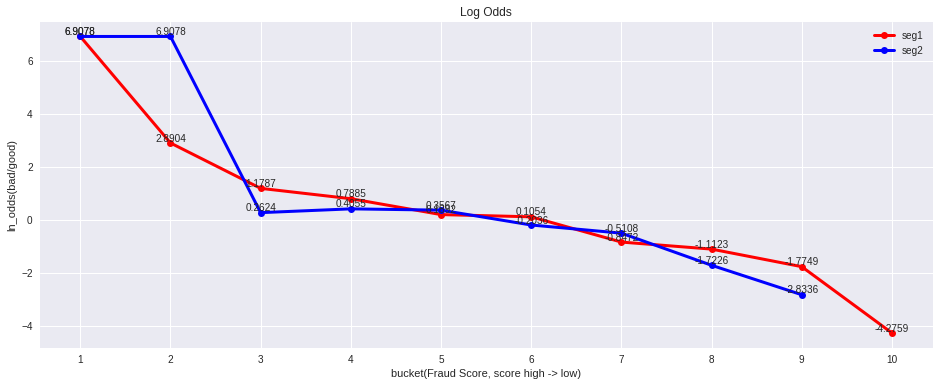

In [31]:
model_ranking_eval(ks_g, ranking_index='ln_odds', group_var='group', show_data=1)

In [60]:
cols = df.columns
cols_type_dict = dict(df.dtypes)
d_cols = [x for x in cols if cols_type_dict[x] == object]
d_cols

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'group']

In [72]:
var_cluster(input_df=df, n_clusters=3)

NameError: name 'var_cluster' is not defined

In [165]:
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [176]:
SparkSession?

In [167]:
values = [("a", 23), ("b", 45), ("c", 10), ("d", 60), ("e", 56), ("f", 2), ("g", 25), ("h", 40), ("j", 33)]

df = spark.createDataFrame(values, ["name", "ages"])
df

DataFrame[name: string, ages: bigint]

In [172]:
df.printSchema()

root
 |-- name: string (nullable = true)
 |-- ages: long (nullable = true)



In [175]:
df.select("name").show()

Py4JJavaError: An error occurred while calling o246.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 4.0 failed 1 times, most recent failure: Lost task 0.0 in stage 4.0 (TID 4, localhost, executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/opt/spark/python/lib/pyspark.zip/pyspark/worker.py", line 125, in main
    ("%d.%d" % sys.version_info[:2], version))
Exception: Python in worker has different version 2.7 than that in driver 3.6, PySpark cannot run with different minor versions.Please check environment variables PYSPARK_PYTHON and PYSPARK_DRIVER_PYTHON are correctly set.

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:234)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:152)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:99)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:322)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	at java.lang.Thread.run(Thread.java:745)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1435)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1423)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1422)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1422)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:802)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:802)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:802)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1650)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1605)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1594)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:628)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1956)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1969)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1982)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:333)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:38)
	at org.apache.spark.sql.Dataset$$anonfun$org$apache$spark$sql$Dataset$$execute$1$1.apply(Dataset.scala:2386)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:57)
	at org.apache.spark.sql.Dataset.withNewExecutionId(Dataset.scala:2788)
	at org.apache.spark.sql.Dataset.org$apache$spark$sql$Dataset$$execute$1(Dataset.scala:2385)
	at org.apache.spark.sql.Dataset.org$apache$spark$sql$Dataset$$collect(Dataset.scala:2392)
	at org.apache.spark.sql.Dataset$$anonfun$head$1.apply(Dataset.scala:2128)
	at org.apache.spark.sql.Dataset$$anonfun$head$1.apply(Dataset.scala:2127)
	at org.apache.spark.sql.Dataset.withTypedCallback(Dataset.scala:2818)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:2127)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:2342)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:248)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:745)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/opt/spark/python/lib/pyspark.zip/pyspark/worker.py", line 125, in main
    ("%d.%d" % sys.version_info[:2], version))
Exception: Python in worker has different version 2.7 than that in driver 3.6, PySpark cannot run with different minor versions.Please check environment variables PYSPARK_PYTHON and PYSPARK_DRIVER_PYTHON are correctly set.

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:234)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:152)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:99)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:322)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	... 1 more


In [177]:
# from pyspark.ml.feature import Bucketizer
# bucketizer = Bucketizer(splits=[ 0, 6, 18, 60, float('Inf') ], inputCol="ages", outputCol="buckets")
# df_buck = bucketizer.setHandleInvalid("keep").transform(df)

# df_buck.show()

IllegalArgumentException: 'requirement failed: Column ages must be of type DoubleType but was actually LongType.'

> score类似<欺诈分>, 取值越大，P(bad)越大.
> 升序模式, cum_bad_rate在cum_good_rate下方.


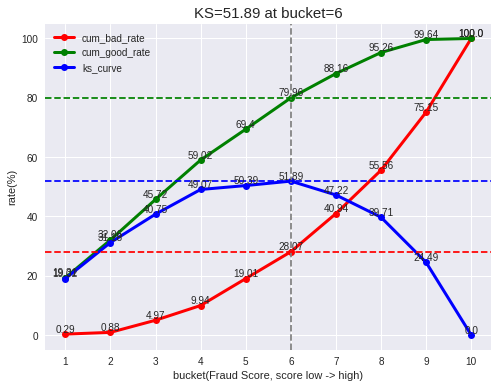

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [16]:
ks_table_plot(input_df=ks_t1)

In [18]:
# ks_table_plot(input_df=ks_t2)

In [98]:
lr = py_lr.Logistic(X=df[c_cols], y=df[target])

In [38]:
woe = WoE(qnt_num=3, min_block_size=2, spec_values=None, v_type='c', bins=None, t_type='b')
woe1 = woe.fit(df['Age'], df[target])
woe1.bins

,feature,labels,bins,min_score,max_score,obs,bad,good,bad_rate,good_rate,odds_good,woe
0,Age,0,-inf,-inf,20.125000,179,82,97,0.458101,0.541899,1.182927,-0.305296
1,Age,1,20.125000,20.125000,28.000000,183,66,117,0.360656,0.639344,1.772727,0.099231
2,Age,2,28.000000,28.000000,38.000000,175,76,99,0.434286,0.565714,1.302632,-0.208901
3,Age,3,38.000000,38.000000,inf,177,66,111,0.372881,0.627119,1.681818,0.046588
4,Age,d_nan,NaN,NaN,NaN,177,52,125,0.293785,0.706215,2.403846,0.403782


/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


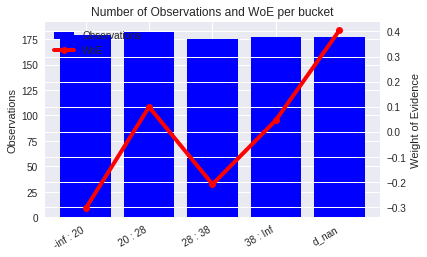

In [39]:
fig = woe1.plot()
plt.show(fig)

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


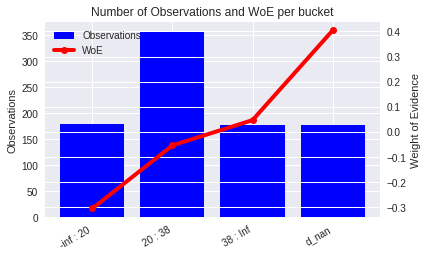

In [40]:
woe2 = woe1.force_monotonic()
fig2 = woe2.plot()
plt.show(fig2)

In [41]:
woe_df = woe2.bins
woe_df 

,feature,labels,bins,min_score,max_score,obs,bad,good,bad_rate,good_rate,odds_good,woe
0,X,0,-inf,-inf,20.125000,179,82,97,0.458101,0.541899,1.182927,-0.305296
1,X,1,20.125000,20.125000,38.000000,358,142,216,0.396648,0.603352,1.521127,-0.053836
2,X,2,38.000000,38.000000,inf,177,66,111,0.372881,0.627119,1.681818,0.046588
3,X,d_nan,NaN,NaN,NaN,177,52,125,0.293785,0.706215,2.403846,0.403782


In [33]:
from model_scaling import *

In [42]:
alpha, beta = scorecard_scale()

In [ ]:
woe_df['score'] = woe_df['odds_goods']